In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('VCB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,6/1/2018,43216,41017,43595,40866,7.57M,5.36%
1,6/4/2018,44960,42837,45187,42458,4.90M,4.04%
2,6/5/2018,44429,44429,45187,43747,4.51M,-1.18%
3,6/6/2018,44808,44050,45263,43671,2.79M,0.85%
4,6/7/2018,44505,44732,44960,44278,3.24M,-0.68%
...,...,...,...,...,...,...,...
1237,5/15/2023,91700,92000,93000,91200,450.50K,-1.19%
1238,5/16/2023,92600,92000,93100,91300,666.10K,0.98%
1239,5/17/2023,92800,92500,93000,92300,572.70K,0.22%
1240,5/18/2023,95000,92900,96000,92200,1.68M,2.37%


In [3]:
#Kiểm tra độ tương quan giữa các cột và lấy cột có tương quan cao nhất để dự đoán 'Price'
features = ['Open', 'High', 'Low']
for i in features:
    correlation = df['Price'].corr(df[i])
    print(i + ": " + str(correlation))


Open: 0.9967135216209101
High: 0.9986067330456387
Low: 0.9979197379972933


In [4]:
#Đọc file dữ liệu chứng khoán và chia train test validate theo tỉ lệ 7:1:2
from sklearn.model_selection import train_test_split
df = pd.read_csv('VCB.csv')
df = df[['Price','Open','High','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Chọn các đặc trưng quan sát

train = df['High']
target = df['Price']

train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size


train_data = train[:train_size]
train_target = target[:train_size]
test_data = train[train_size:train_size+test_size]
test_target = target[train_size:train_size+test_size]
val_data = train[train_size+test_size:]
print(val_data)
train_data

1117    76400
1118    78000
1119    76600
1120    76900
1121    76500
        ...  
1237    93000
1238    93100
1239    93000
1240    96000
1241    94900
Name: High, Length: 125, dtype: int64


0      43595
1      45187
2      45187
3      45263
4      44960
       ...  
864    76025
865    76877
866    76103
867    76645
868    76258
Name: High, Length: 869, dtype: int64

In [5]:
x_train= np.array(train_data).reshape(-1,1)
x_test = np.array(test_data).reshape(-1,1)


rf_model = RandomForestRegressor(n_estimators=600,max_depth = 8, random_state=100)
rf_model.fit(x_train, train_target)

y = test_data
predictions = rf_model.predict(x_test)
print(predictions)
# thres = np.unique([j for i in rf_model.estimators_ for j in i.tree_.threshold])
# np.sort(thres)[-10:]
# print(thres)

# 5. Quá trình Validate
x_val= np.array(val_data).reshape(-1,1)
y_val = np.array(val_data)
y_pred_val =  rf_model.predict(x_val)
print(y_pred_val)

[75530.95368796 75426.38953283 75493.26117211 76010.38997563
 76254.07153833 80583.06587558 81958.17724206 82339.03499206
 79923.39749627 78595.846747   77611.2269808  77265.78433946
 77265.78433946 76652.30438067 76304.8778516  76304.8778516
 76304.8778516  78916.14769256 78593.70882159 76707.98750165
 77317.36844869 77265.78433946 76652.30438067 76238.85455131
 75928.70772342 76707.98750165 77578.77501548 77227.34961868
 78935.16415341 79750.45259755 79091.27053753 78170.0492584
 78567.26966052 78583.41730267 78584.25669145 78170.0492584
 78170.0492584  78170.0492584  78165.98221277 78165.98221277
 83587.5033373  82015.48652778 87895.41049206 86710.22208333
 86672.83861111 86672.83861111 89261.99166667 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 87240.50183333 88054.86019444 87869.57715873
 87388.9610754  86672.83861111 86710.22208333 86963.88227778
 86963.88227778 86903.67283

In [6]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(np.mean((test_target - predictions)**2))
print(rmse)

1256.4220950795418


In [7]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data)


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data)
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the closing prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)





In [8]:
#Dự đoán 30 ngày tiếp theo
y_next_30_days = rf_model.predict(np.array(feature_next_30_days).reshape(-1,1))
print(y_next_30_days)



[89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333 89920.45833333 89920.45833333
 89920.45833333 89920.45833333]


Validation RMSE: 9440.521571456999
Testing RMSE: 11286.291656963333
Validation MAPE: 9.584666904907357
Testing MAPE: 12.13668864849816
Validation MAE: 8091.854973288064
Testing MAE: 9269.669771386652


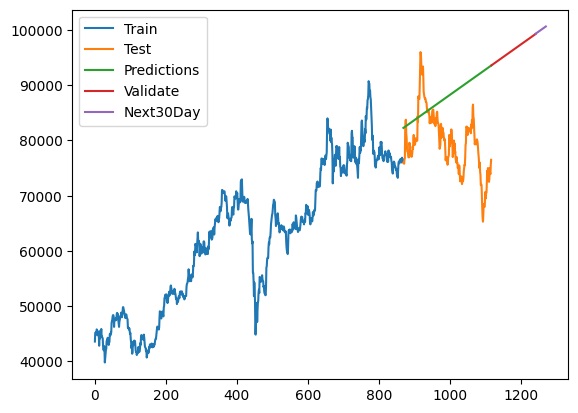

In [9]:
valid_rmse = np.sqrt(np.mean((y_pred_val_ln - y_val_ln)**2))
test_rmse = np.sqrt(np.mean((y_pred_ln - y_test_ln)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

valid_mape = np.mean(np.abs((y_pred_val_ln - y_val_ln) / y_val_ln)) * 100
test_mape = np.mean(np.abs((y_pred_ln - y_test_ln) / y_test_ln)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

valid_mae = np.mean(np.abs(y_pred_val_ln - y_val_ln))
test_mae = np.mean(np.abs(y_pred_ln - y_test_ln))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred_ln)
plt.plot(val_data.index, y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [10]:
import matplotlib.pyplot as plt

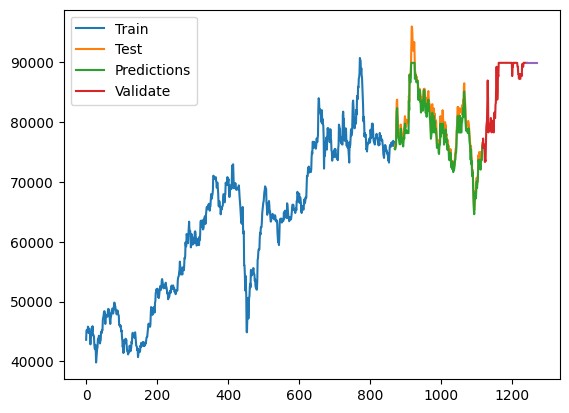

In [11]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, predictions)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate'])
plt.show()